In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
vaccine_df = pd.DataFrame(pd.read_csv(
    'covid.csv', 
    usecols=(
        'date', 
        'location', 
        'people_vaccinated_per_hundred', 
        'people_fully_vaccinated_per_hundred', 
        'total_boosters_per_hundred'
    )
))

In [70]:
vaccine_df.date = pd.to_datetime(vaccine_df.date)
vaccine_df = vaccine_df.loc[vaccine_df.date == pd.to_datetime('2021-12-30')]

In [72]:
vaccine_df = vaccine_df.dropna(subset=(
    'people_vaccinated_per_hundred', 
    'people_fully_vaccinated_per_hundred', 
    'total_boosters_per_hundred'
))

In [73]:
vaccine_df = vaccine_df.set_index(keys='location')

In [75]:
vaccine_df['percent_boosters'] = vaccine_df['total_boosters_per_hundred']
vaccine_df['percent_fully_vaccinated'] = (
    vaccine_df['people_fully_vaccinated_per_hundred'] - 
    vaccine_df['total_boosters_per_hundred']
)
vaccine_df['percent_partially_vaccinated'] = (
    vaccine_df['people_vaccinated_per_hundred'] - 
    vaccine_df['people_fully_vaccinated_per_hundred']
)

In [77]:
vaccine_df = vaccine_df.sort_values(by=['people_vaccinated_per_hundred'])

In [78]:
vaccine_df = vaccine_df.drop(
    columns=[
        'people_vaccinated_per_hundred', 
        'people_fully_vaccinated_per_hundred', 
        'total_boosters_per_hundred', 
        'date']
)
vaccine_df = vaccine_df.drop('Upper middle income')
vaccine_df = vaccine_df.drop('Lower middle income')

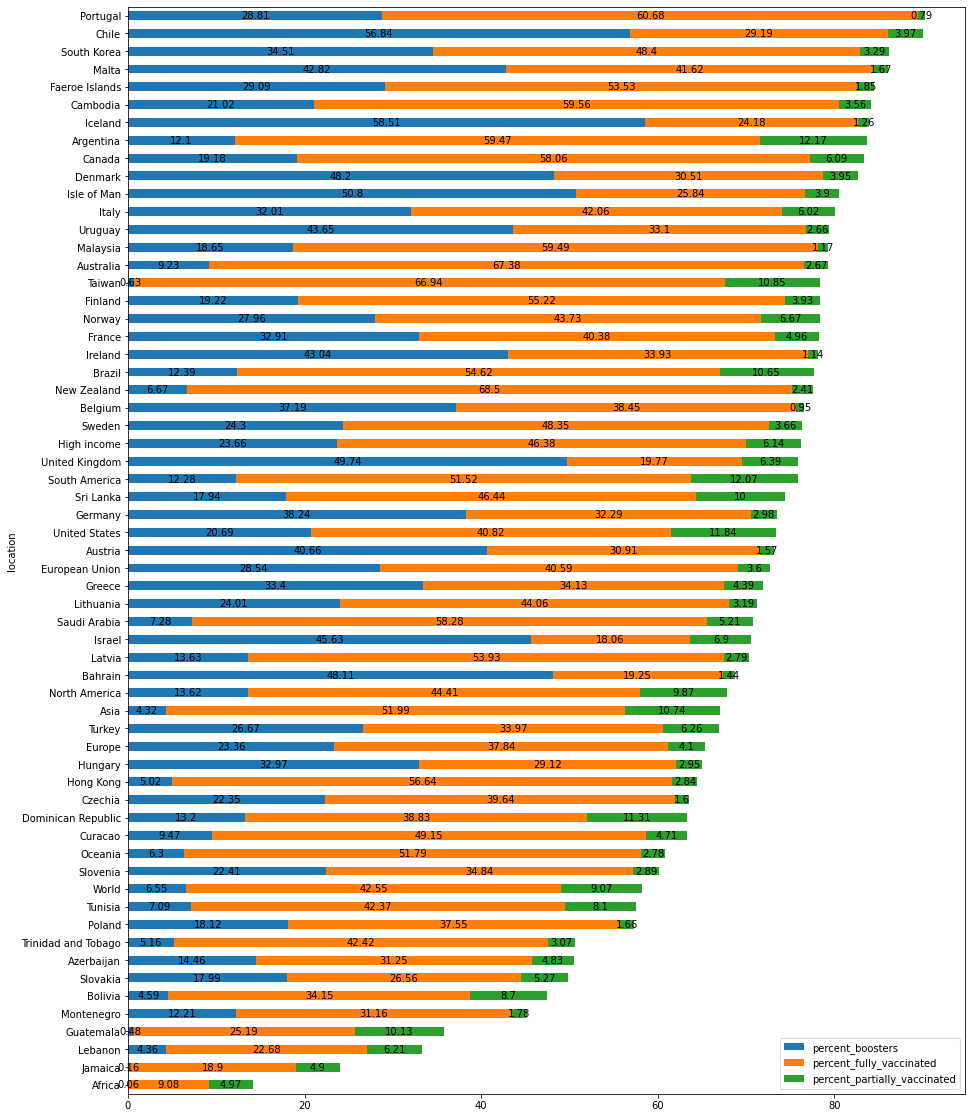

In [79]:
ax = vaccine_df.plot.barh(stacked=True, figsize=(15,20))
for c in ax.containers:
    ax.bar_label(c, label_type='center')

In [82]:
limited_countries = ['Portugal', 'South Korea', 'Canada', 'United States', 'Jamaica'][::-1]
limited_vaccine_df = vaccine_df.loc[limited_countries]

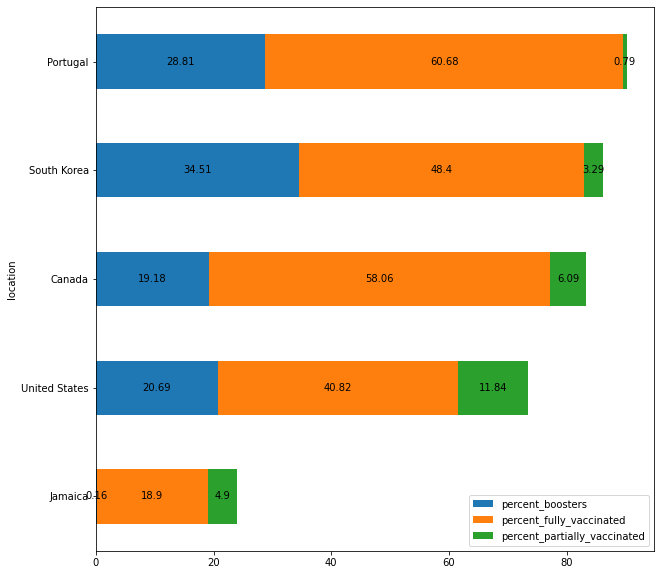

In [83]:
ax = limited_vaccine_df.plot.barh(stacked=True, figsize=(10,10))
for c in ax.containers:
    ax.bar_label(c, label_type='center')

In [104]:
cases_df = pd.DataFrame(pd.read_csv('covid.csv', usecols=['date', 'location', 'new_cases_smoothed_per_million']))
cases_df['date'] = pd.to_datetime(cases_df['date'])

In [112]:
cases_df = cases_df.set_index(['date', 'location'])['new_cases_smoothed_per_million'].unstack(1)

In [114]:
cases_df = cases_df[limited_countries]
cases_df = cases_df.dropna()

<AxesSubplot:xlabel='date'>

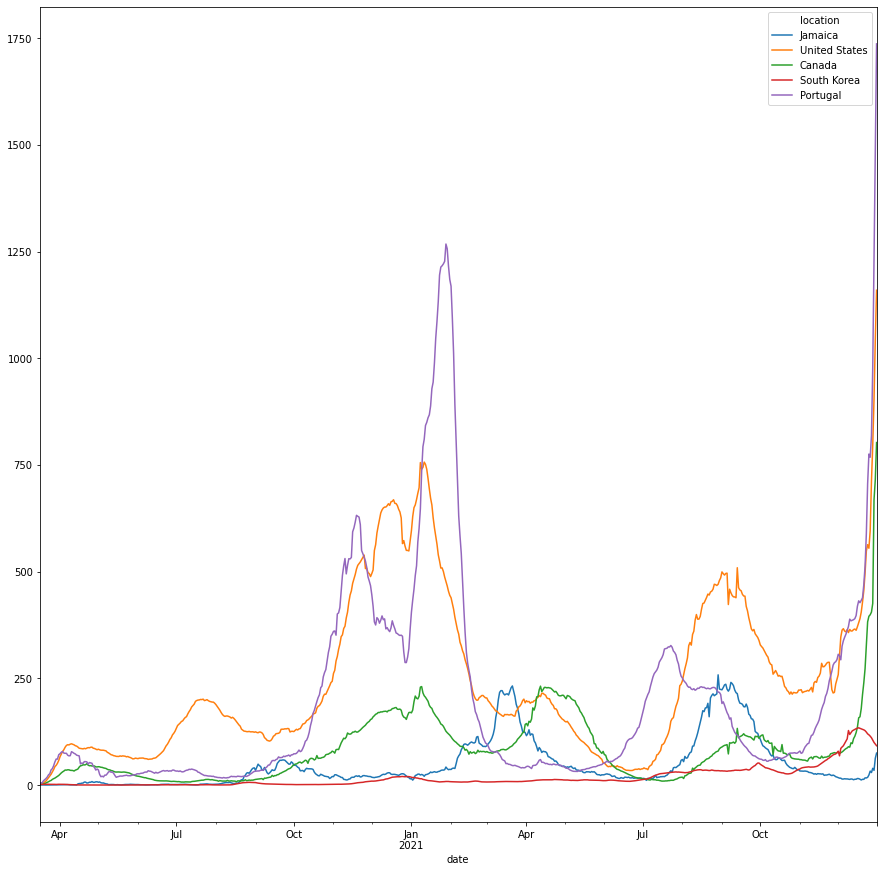

In [118]:
cases_df.plot(figsize=(15,15))

In [121]:
deaths_df = pd.DataFrame(pd.read_csv('covid.csv', usecols=['date', 'location', 'new_deaths_smoothed_per_million']))
deaths_df['date'] = pd.to_datetime(deaths_df['date'])

In [123]:
deaths_df = deaths_df.set_index(['date', 'location'])['new_deaths_smoothed_per_million'].unstack(1)

In [124]:
deaths_df = deaths_df[limited_countries]
deaths_df = deaths_df.dropna()

<AxesSubplot:xlabel='date'>

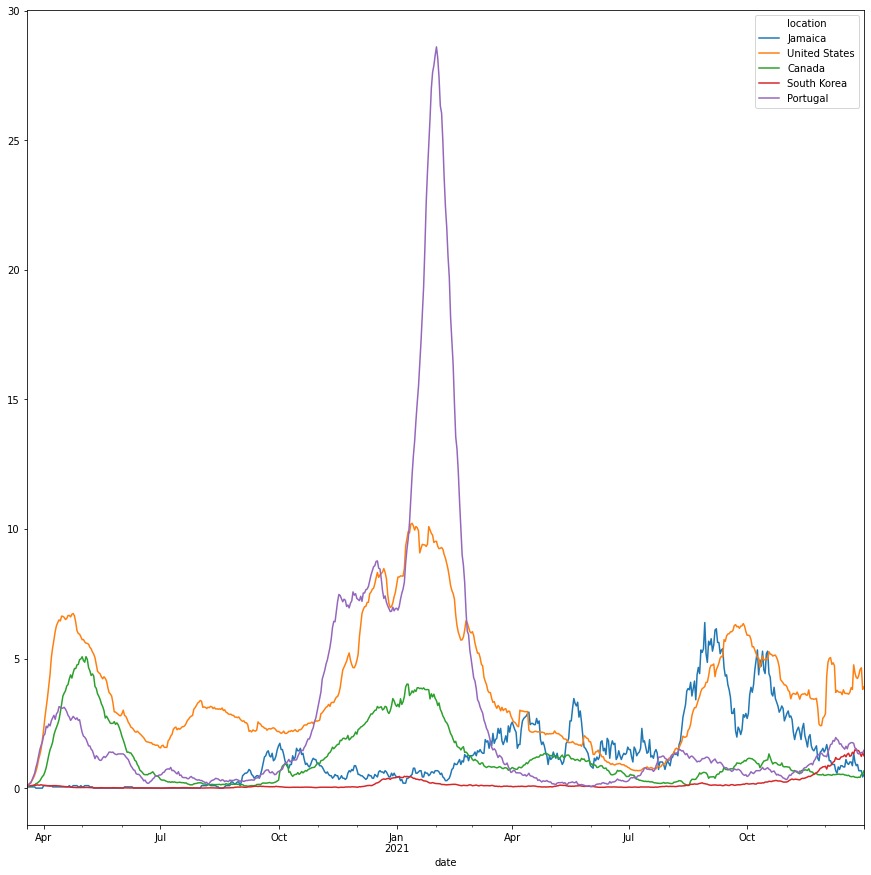

In [125]:
deaths_df.plot(figsize=(15,15))